# CRACK DETECTION using GAPS DATASET

## IMPORT LIBRARIES

In [1]:
from __future__ import print_function
import readdata
import readmodel
from tensorflow import keras
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


## LOAD DATA

In [2]:

x_train, y_train_binary, x_valid, y_valid_binary, x_test, y_test_binary, data_name = readdata.gapv164(tr = 1, val = 1, te = 1)
input_shape = x_train[0,:,:,:].shape
print(f'input shape is : {input_shape}')
num_classes = y_train_binary.shape[1]
print(f'number of classes are : {num_classes}')

loading 1 chunk  out of 1 of training in v1 gaps --- MAX 154
loading 1 chunk out of 1  of validation in v1 gaps --- MAX 7
loading 1 chunk out of 1 of test in v1 gaps --- MAX 26
data name  is: gaps_v1_64
x_train shape: (32000, 64, 64, 3)
32000 train samples
32000 valid samples
32000 test samples
input shape is : (64, 64, 3)
number of classes are : 2


## BUILD MODEL

In [3]:
model_name = 'model_3' # 'model_1', 'model_2', or model_3
model = readmodel.modelchoose(model_name,input_shape, num_classes)
model.summary()

Transfer_learning_vgg
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16,

## COMPILE MODEL

In [4]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)

# Let's train the model using RMSprop
model.compile( loss = 'binary_crossentropy', # loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

 ## GENERATE IMAGES

In [8]:
# create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

## HYPERPARAMETERS

In [11]:
epochs = 20 # 200
batch_size = 200
#num_classes = y_train_binary.shape[1]


## FIT DATA TO MODEL using IMG GENERATOR

In [12]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train_binary, batch_size=batch_size),
                    epochs=epochs, 
                    steps_per_epoch=len(x_train) / batch_size,
                    validation_data=(x_valid, y_valid_binary),
                    shuffle=True)
                    

Epoch 1/20
160/160 [==============================] - 85s 530ms/step - loss: 0.6498 - accuracy: 0.8714 - val_loss: 0.4833 - val_accuracy: 0.8006
Epoch 2/20
160/160 [==============================] - 83s 518ms/step - loss: 0.4756 - accuracy: 0.8896 - val_loss: 0.4721 - val_accuracy: 0.8043
Epoch 3/20
160/160 [==============================] - 83s 521ms/step - loss: 0.5050 - accuracy: 0.8879 - val_loss: 0.6944 - val_accuracy: 0.7753
Epoch 4/20
160/160 [==============================] - 84s 524ms/step - loss: 0.4630 - accuracy: 0.8944 - val_loss: 0.6059 - val_accuracy: 0.7345
Epoch 5/20
160/160 [==============================] - 84s 524ms/step - loss: 0.4784 - accuracy: 0.8923 - val_loss: 0.6124 - val_accuracy: 0.7218
Epoch 6/20
160/160 [==============================] - 84s 524ms/step - loss: 0.4735 - accuracy: 0.8958 - val_loss: 0.7035 - val_accuracy: 0.7764
Epoch 7/20
160/160 [==============================] - 84s 526ms/step - loss: 0.4739 - accuracy: 0.8950 - val_loss: 0.5549 - val_ac

## FIT DATA to MODEL w/o IMG GENRATOR

In [ ]:
history_2 = model.fit(x_train, y_train_binary,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_valid, y_valid_binary),
              shuffle=True)

## MODEL SCORE

In [14]:
scores = model.evaluate(x_test, y_test_binary, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

32000/1 - 21s - loss: 0.1240 - accuracy: 0.9451
Test loss: 0.21335054863395636
Test accuracy: 0.9450625


## ACCURACY & VAL vs EPOCHS PLOTS

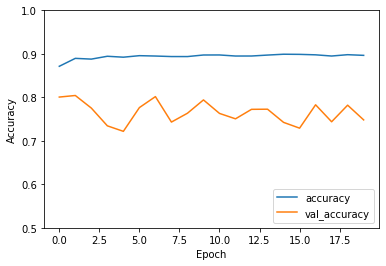

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## SAVE MODEL and WEIGHTS

In [ ]:
# Save model and weights
model_name = 'gaps_model_1.h5'
os.getcwd()
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# GRID SEARCH

## GRID SEARCH FIT for H_PARAM TUNNING

In [79]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(model_name):
    #model_name = 'model_3' # 'model_1', 'model_2', 'model_3'
    model = readmodel.modelchoose(model_name,input_shape, num_classes)

    model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
    
    return model

modelC = KerasClassifier(build_fn=create_model, verbose=2)

# using grid search
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)

epochs = [2]
model_name = ['model_1', 'model_3']

param_grid = dict(model_name = model_name)

grid = GridSearchCV(estimator = modelC , param_grid=param_grid)
grid_result = grid.fit(x_train, y_train_binary)

/home/ali/tf_gpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


last change
X current model is: model_1_2CCP_1FDD
Train on 21333 samples
21333/21333 [==============================] - 10s 447us/sample - loss: 0.1114 - accuracy: 0.8810
10667/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

last change
X current model is: model_1_2CCP_1FDD
Train on 21333 samples
21333/21333 [==============================] - 9s 435us/sample - loss: 0.1092 - accuracy: 0.8808
10667/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

last change
X current model is: model_1_2CCP_1FDD
Train on 21334 samples
21334/21334 [==============================] - 10s 446us/sample - loss: 0.1130 - accuracy: 0.8759
10666/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Transfer_learning_vgg
Train on 21333 samples
21333/21333 [==============================] - 16s 762us/sample - loss: 0.0968 - accuracy: 0.8813
10667/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Transfer_learning_vgg
Train on 21333 samples
21333/21333 [==============================] - 17s 778us/sample - loss: 0.0987 - accuracy: 0.8821
10667/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Transfer_learning_vgg
Train on 21334 samples
21334/21334 [==============================] - 16s 763us/sample - loss: 0.1020 - accuracy: 0.8776
10666/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Transfer_learning_vgg
Train on 32000 samples
32000/32000 [==============================] - 21s 660us/sample - loss: 0.0949 - accuracy: 0.8823


## GRID SEARCH RESULTS

In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882031 using {'model_name': 'model_3'}
0.881125 (0.003428) with: {'model_name': 'model_1'}
0.882031 (0.003439) with: {'model_name': 'model_3'}


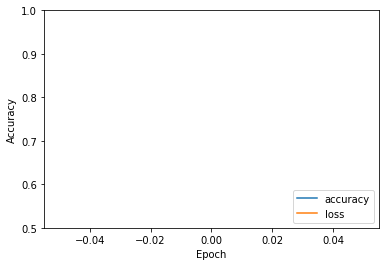

In [98]:
history = grid_result.best_estimator_.model.history

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [97]:
history.history

{'loss': [0.09485576046910137], 'accuracy': [0.88234377]}